# Reverse engineering de VERA Onderhoud API

### Korte beschrijving werkwijze
1. VERA heeft in januari 2022 de nieuwe OpenAPI specificaties gepubliceerd. Per domein wordt één API gepubliceerd op GitHub. Deze OpenAPI3 specificatie zijn flinke bestanden, circa 8000 regels code. In totaal zijn er dus 10 API's. 
2. In dit Notebook wordt de Vastgoed API ge-reverse-engineered zodat er inzicht komt in de dataobjecten in de VERA OpenAPI. Dit inzicht wordt verkregen door drie bestanden op te leveren: 
- een UML Class diagram gemaakt met PlantUML 
- een .csv bestand met de objecten en hun klassen
- een json bestand.

## 1. Basic info of the API and inspection

In [54]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\VERA'

In [1]:
import glob
my_yamls=glob.glob('*.yaml')
my_yamls

['Algemeen.yaml',
 'Dossier.yaml',
 'Financien.yaml',
 'Kwaliteit.yaml',
 'Onderhoud.yaml',
 'Overeenkomsten.yaml',
 'Projectontwikkeling.yaml',
 'Relaties.yaml',
 'Vastgoed.yaml',
 'Woonruimteverdeling.yaml']

In [2]:
import yaml

# load the spec file and read the yaml to create a python dictionary 'spec'
with open('onderhoud.yaml') as f:
    spec = yaml.safe_load(f.read())

In [3]:
list(spec)

['openapi', 'info', 'servers', 'tags', 'paths', 'security', 'components']

In [4]:
OAS_version =spec['openapi']
API_name = spec['info']['title']
API_version =spec['info']['version']
print(OAS_version, API_name, API_version)

3.0.0 VERA-Onderhoud 4.0


## 2. Getting the paths and endpoints

In [5]:
#getting the paths
paths = list(spec['paths'])
len(paths)

17

In [6]:
#getting the paths and http verbs
endpoints_dict = {}
for i in range (len(paths)):
    endpoints_dict[paths[i]]=list(spec['paths'][paths[i]])
endpoints_dict 

{'/ping': ['get'],
 '/defecten': ['get', 'post', 'put', 'patch'],
 '/defecten/{id}': ['get', 'put', 'patch'],
 '/inspectierapporten': ['get', 'post', 'put', 'patch'],
 '/inspectierapporten/{id}': ['get', 'put', 'patch'],
 '/onderhoudsbestedingen': ['get', 'post', 'put', 'patch'],
 '/onderhoudsbestedingen/{id}': ['get', 'put', 'patch'],
 '/onderhoudsorders': ['get', 'post', 'put', 'patch'],
 '/onderhoudsorders/{id}': ['get', 'put', 'patch'],
 '/onderhoudstaken': ['get', 'post', 'put', 'patch'],
 '/onderhoudstaken/{id}': ['get', 'put', 'patch'],
 '/onderhoudstaakvoorcalculaties': ['get', 'post', 'put', 'patch'],
 '/onderhoudstaakvoorcalculaties/{id}': ['get', 'put', 'patch'],
 '/onderhoudsverzoeken': ['get', 'post', 'put', 'patch'],
 '/onderhoudsverzoeken/{id}': ['get', 'put', 'patch'],
 '/standaardprijzen': ['get', 'post', 'put', 'patch'],
 '/standaardprijzen/{id}': ['get', 'put', 'patch']}

## 3. Getting the components

In [7]:
objects = list(spec['components']['schemas'])
print(len(objects))
objects.sort()
objects

20


['Defect',
 'Defect-sleutels',
 'ExtraAttribuut',
 'Foutbericht',
 'Inspectierapport',
 'Inspectierapport-sleutels',
 'Onderhoudsbesteding',
 'Onderhoudsbesteding-sleutels',
 'Onderhoudsorder',
 'Onderhoudsorder-sleutels',
 'Onderhoudstaak',
 'Onderhoudstaak-sleutels',
 'Onderhoudstaakvoorcalculatie',
 'Onderhoudstaakvoorcalculatie-sleutels',
 'Onderhoudsverzoek',
 'Onderhoudsverzoek-sleutels',
 'Referentiedata',
 'Referentiedata-sleutels',
 'Standaardprijs',
 'Standaardprijs-sleutels']

In [8]:
# super lambda function to remove '-sleutels' from the list of objects
objects = [x for x in objects if "-sleutels" not in x ]
objects

['Defect',
 'ExtraAttribuut',
 'Foutbericht',
 'Inspectierapport',
 'Onderhoudsbesteding',
 'Onderhoudsorder',
 'Onderhoudstaak',
 'Onderhoudstaakvoorcalculatie',
 'Onderhoudsverzoek',
 'Referentiedata',
 'Standaardprijs']

In [113]:
my_string.replace('#/components/schemas/', 'allOf ')

'allOf Geometrie'

In [85]:
spec['components']['schemas']['Punt']['allOf'][0]

{'$ref': '#/components/schemas/Geometrie'}

In [39]:
punt_list = spec['components']['schemas']['Punt']['allOf']
punt_list[1]

{'type': 'object',
 'properties': {'breedtegraad': {'type': 'number',
   'format': 'float',
   'description': 'De breedtegraad.'},
  'lengtegraad': {'type': 'number',
   'format': 'float',
   'description': 'De lengtegraad.'},
  'extra-attributen': {'description': 'Mogelijkheid om het bericht uit te breiden met attributen die nog niet in het logisch datamodel beschikbaar zijn',
   'type': 'array',
   'items': {'$ref': '#/components/schemas/ExtraAttribuut'}},
  'informatieobjecten': {'type': 'string',
   'format': 'uri',
   'description': 'Referentie naar Informatieobject in de vorm: vera/v4/informatieobjecten/12345'}}}

In [37]:
punt_list_dict = punt_list[1]
list(punt_list_dict['properties'])

['breedtegraad', 'lengtegraad', 'extra-attributen', 'informatieobjecten']

In [42]:
spec['components']['schemas']['Punt']['allOf'][1]['properties']

{'breedtegraad': {'type': 'number',
  'format': 'float',
  'description': 'De breedtegraad.'},
 'lengtegraad': {'type': 'number',
  'format': 'float',
  'description': 'De lengtegraad.'},
 'extra-attributen': {'description': 'Mogelijkheid om het bericht uit te breiden met attributen die nog niet in het logisch datamodel beschikbaar zijn',
  'type': 'array',
  'items': {'$ref': '#/components/schemas/ExtraAttribuut'}},
 'informatieobjecten': {'type': 'string',
  'format': 'uri',
  'description': 'Referentie naar Informatieobject in de vorm: vera/v4/informatieobjecten/12345'}}

In [9]:
#creating a dictionary with objects and their properties
object_dict ={}
#objects = list(spec['components']['schemas'])
for i in range (len(objects)):
    try:
        object_dict[objects[i]]=list(spec['components']['schemas'][objects[i]]['properties'])#['properties']
    except:
        my_list= []
        my_dict = spec['components']['schemas'][objects[i]]['allOf'][0]
        for key, value in my_dict.items():
            my_string = str(value)
        my_string = my_string.replace('#/components/schemas/', 'allOf: ')
        my_list.append(my_string)
        object_dict[objects[i]] = my_list+list(spec['components']['schemas'][objects[i]]['allOf'][1]['properties'])
object_dict 

{'Defect': ['id',
  'idExtern',
  'idGegevensbeheerder',
  'code',
  'soort',
  'omschrijving',
  'status',
  'melddatum',
  'aangetroffenOorzaak',
  'bouwkundigElement',
  'cluster',
  'collectiefObject',
  'eenheid',
  'inspectierapport',
  'locatie',
  'onderhoudsverzoeken',
  'oorzaak',
  'relaties',
  'extra-attributen',
  'informatieobjecten'],
 'ExtraAttribuut': ['naam', 'waarde'],
 'Foutbericht': ['code', 'omschrijving'],
 'Inspectierapport': ['id',
  'idExtern',
  'idGegevensbeheerder',
  'code',
  'soort',
  'omschrijving',
  'status',
  'geconstateerdeDefecten',
  'inspectieOrder',
  'relaties',
  'voorgesteldeOnderhoudstaken',
  'extra-attributen',
  'informatieobjecten'],
 'Onderhoudsbesteding': ['id',
  'idExtern',
  'idGegevensbeheerder',
  'code',
  'soort',
  'omschrijving',
  'uitvoerdatum',
  'uitvoerBegintijd',
  'uitvoerEindtijd',
  'aantal',
  'bedrag',
  'meeteenheid',
  'onderhoudstaak',
  'reistijd',
  'extra-attributen',
  'informatieobjecten'],
 'Onderhoudsor

## 4. Saving as plantuml, .csv and .json

### 4a. Creating a plantuml file

In [37]:
textfile = open(API_name+"_API_plantuml.txt", "w")
textfile.write('@startuml\n')
for key, value in object_dict.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
#textfile.write('}\n')
textfile.write('@enduml')
textfile.close() 

In [38]:
import glob
my_txts = glob.glob('*.txt')
my_txts

['VERA-Onderhoud_API_plantuml.txt']

In [22]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA'

In [48]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA\VERA-Onderhoud_API_plantuml.txt

In [40]:
#convert the txt file to an .png image using plantuml
!python -m plantuml VERA-Onderhoud_API_plantuml.txt

[{'filename': 'VERA-Onderhoud_API_plantuml.txt', 'gen_success': True}]


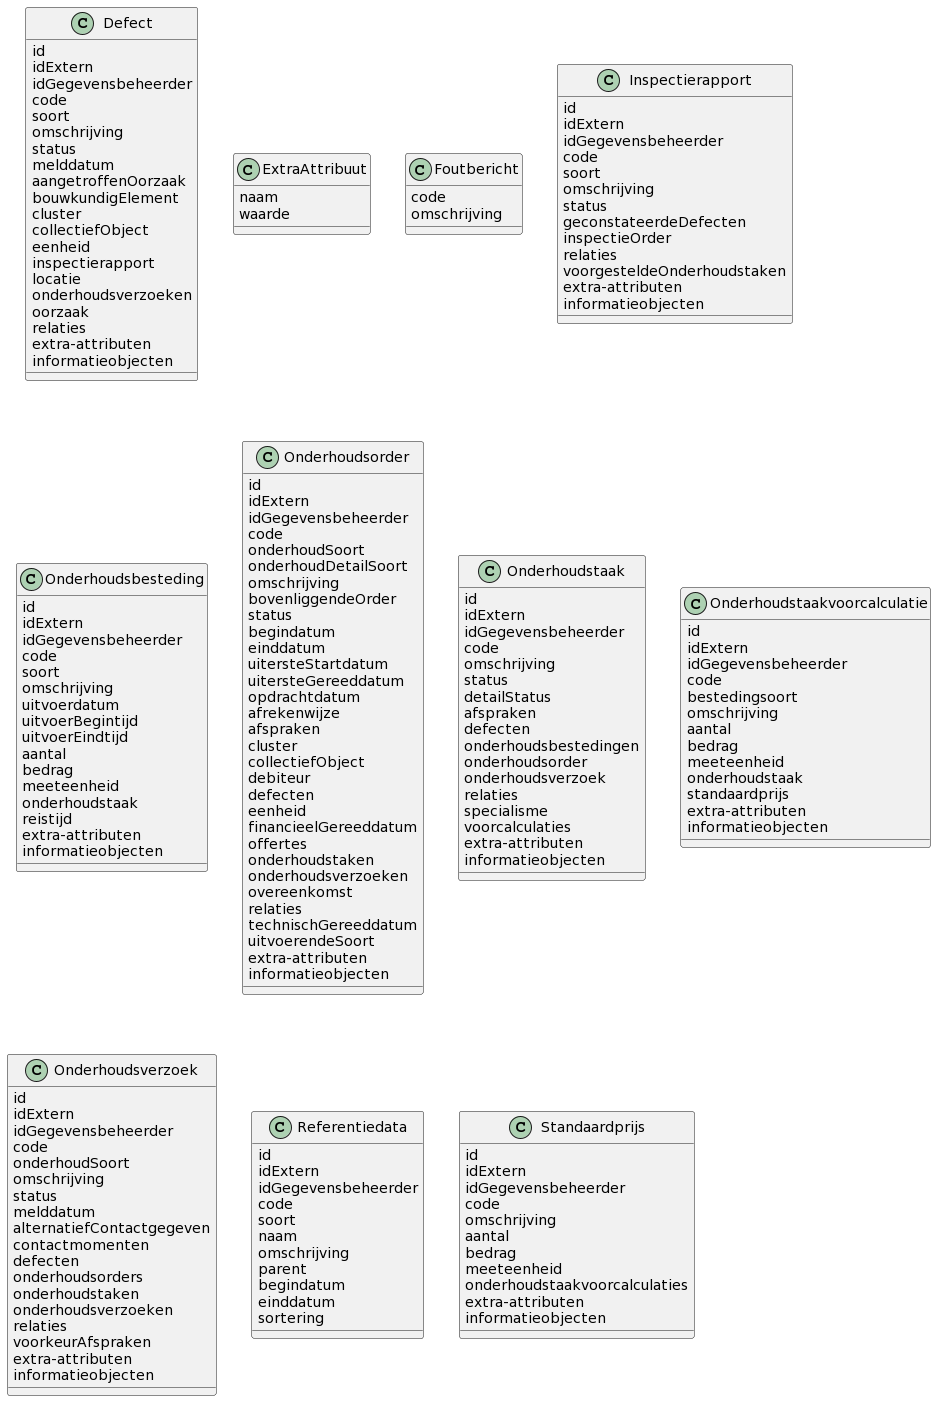

In [41]:
#show the generated png
from IPython import display
display.Image(filename="VERA-Onderhoud_API_plantuml.png", width=1000, height=800)

### 4b. Saving as a .csv file

In [29]:
with open(API_name+"_API_objecten.csv", mode="w") as my_csv:
    for key, value in object_dict.items():
        my_csv.write(str(key)+";")
        for i in range (len(value)-1):
            my_csv.write(value[i]+",")#write values + a comma  
        my_csv.write(value[-1]+"\n") #write last value (and no comma)

In [35]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA'

In [33]:
import glob
my_csvs=glob.glob('*.csv')
my_csvs

['VERA-Onderhoud_API_objecten.csv']

In [36]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\\VERA\\VERA-Onderhoud_API_objecten.csv

### 4c. Saving as a .json file

In [43]:
#converting the python dict to a JSON 
import json 
      
# Serializing json  
json_object = json.dumps(object_dict, indent = 4) 
print(json_object)

{
    "Defect": [
        "id",
        "idExtern",
        "idGegevensbeheerder",
        "code",
        "soort",
        "omschrijving",
        "status",
        "melddatum",
        "aangetroffenOorzaak",
        "bouwkundigElement",
        "cluster",
        "collectiefObject",
        "eenheid",
        "inspectierapport",
        "locatie",
        "onderhoudsverzoeken",
        "oorzaak",
        "relaties",
        "extra-attributen",
        "informatieobjecten"
    ],
    "ExtraAttribuut": [
        "naam",
        "waarde"
    ],
    "Foutbericht": [
        "code",
        "omschrijving"
    ],
    "Inspectierapport": [
        "id",
        "idExtern",
        "idGegevensbeheerder",
        "code",
        "soort",
        "omschrijving",
        "status",
        "geconstateerdeDefecten",
        "inspectieOrder",
        "relaties",
        "voorgesteldeOnderhoudstaken",
        "extra-attributen",
        "informatieobjecten"
    ],
    "Onderhoudsbesteding": [
     

In [46]:
#save as a .json file
import json
with open(API_name+'_API_objecten.json', 'w', encoding='utf-8') as f:
    json.dump(json_object, f, ensure_ascii=False, indent=4)

In [47]:
import glob
my_jsons = glob.glob('*.json')
my_jsons

['VERA-Onderhoud_API_objecten.json']